In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## Preprocess Visualization

In [2]:
vp = str(input("Visualize Preprocessings? "))

if vp.upper() == 'Y':
    leukocyte = '/mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Health/Leukomia/splitted_aug/leukocyte/gan/0/0000.png'        

    leukocyte_img = cv2.imread(leukocyte)
    
    gray = cv2.cvtColor(leukocyte_img, cv2.COLOR_BGR2GRAY)
    
    ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    gray[thresh_gray == 255] = 0
    
    bbox = cv2.boundingRect(gray)
    x, y, w, h = bbox
    foreground = leukocyte_img[y:y+h, x:x+w]
    
    ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
    foreground[thresh_foreground == 255] = 0
    
    res = cv2.resize(foreground, (64, 64))
    
    plt.imshow(res)
    print(res.shape)
else:
    pass

Visualize Preprocessings? n


## Preprocess All

In [3]:
processed = str(input("classify train dir: "))
processed = os.path.join(processed, 'classify train')

classify train dir: /mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Health/Leukomia/splitted_aug/leukocyte


Required Size: 64
Save using opencv ? n


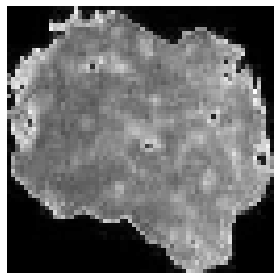

In [4]:
h = int(input("Required Size: "))
w = h
save = str(input("Save using opencv ? "))

for folder_name in os.listdir(processed):
    folder = os.path.join(processed,folder_name)
    for classes_name in os.listdir(folder):
        classes = os.path.join(folder, classes_name)
        for file_name in os.listdir(classes):
            file = os.path.join(classes, file_name)
            img = cv2.imread(file)
            if img.shape[0] < h or img.shape[1] < w:
                os.remove(file)
            else:
                res = cv2.resize(img, (h, w))
                gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
                if save.upper() == 'Y':
                    cv2.imwrite(file, gray)
                elif save.upper() == 'N':
                    plt.axis('off')
                    plt.tight_layout()
                    plt.margins(0,0)
                    plt.imshow(gray, cmap = 'gray')
                    plt.savefig(file, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [5]:
resize = str(input("Do you want to resize? "))
h = int(input("Required Size: "))
w = h

if resize.upper() == 'Y':
    for folder_name in os.listdir(processed):
        folder = os.path.join(processed,folder_name)
        for classes_name in os.listdir(folder):
            classes = os.path.join(folder, classes_name)
            for file_name in os.listdir(classes):
                file = os.path.join(classes, file_name)
                img = cv2.imread(file,0)
                res = cv2.resize(img, (h, w))
                cv2.imwrite(file, res)
else:
    pass

Do you want to resize? y
Required Size: 64
